In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import json

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [38]:
wine = pd.read_csv("../data/wineQualityReds.csv")
del wine["Unnamed: 0"]
wine.sample(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
166,6.8,0.640,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,5
1183,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5
383,8.3,0.260,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6
855,7.6,0.735,0.02,2.5,0.071,10.0,14.0,0.99538,3.51,0.71,11.7,7
839,6.0,0.500,0.04,2.2,0.092,13.0,26.0,0.99647,3.46,0.47,10.0,5
1253,7.9,0.660,0.00,1.4,0.096,6.0,13.0,0.99569,3.43,0.58,9.5,5
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
914,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,6
1080,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6
252,11.1,0.350,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5,5


In [39]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [67]:
wine.columns[[6, 10]]

Index(['total.sulfur.dioxide', 'alcohol'], dtype='object')

In [91]:
y = np.where(wine.quality == 5, 1, 0)
X = wine.iloc[:, :-1].values
X = X[:, [6, 10]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [92]:
pd.Series(y).value_counts()

0    918
1    681
dtype: int64

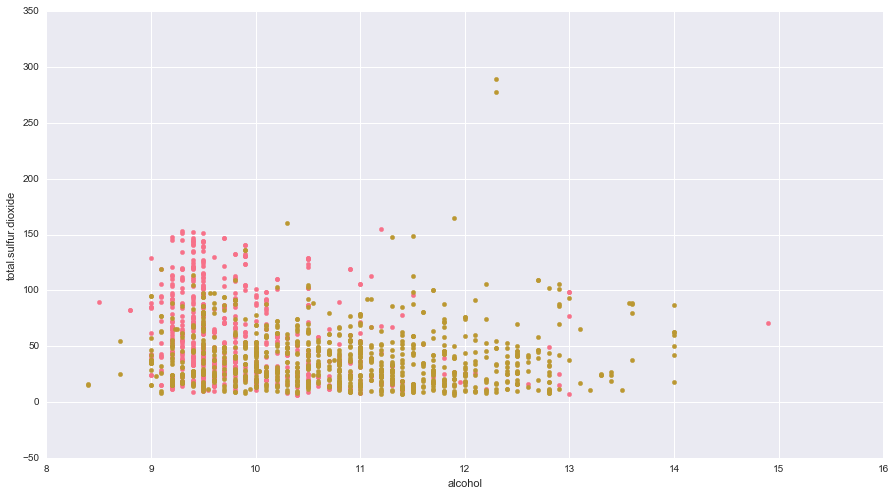

In [93]:
plt.figure(figsize=(15, 8))
colors = sns.color_palette("husl")
features = ["alcohol", "total.sulfur.dioxide"]
for i, v in enumerate(pd.Series(y).unique()):
    df = wine[y == v]
    plt.scatter(df[features[0]], df[features[1]], color = colors[i])
    
plt.xlabel(features[0])
plt.ylabel(features[1])

In [94]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.69791666666666663

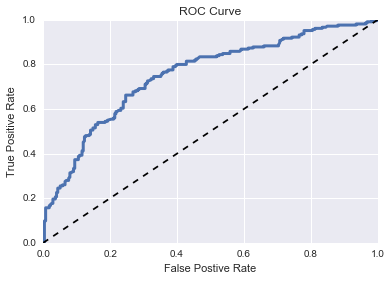

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, [1]])

plt.plot(fpr, tpr, linewidth = 3)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0,1], [0,1], ls = "--", color = "k")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [96]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:, [1]])

0.75313476840011362

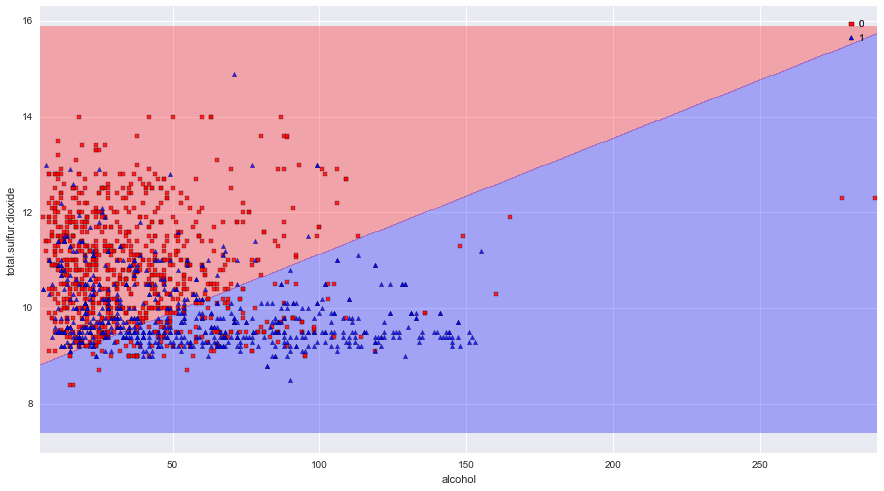

In [97]:
plt.figure(figsize=(15, 8))
plot_decision_regions(X, y, lr)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [72]:
y = np.where(wine.quality == 5, 1, 0)
X = wine.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [73]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.74375000000000002

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [100]:
for f, i in zip(wine.columns[:-1], tree.feature_importances_):
    print(f, i)

fixed.acidity 0.201532299853
volatile.acidity 0.798467700147


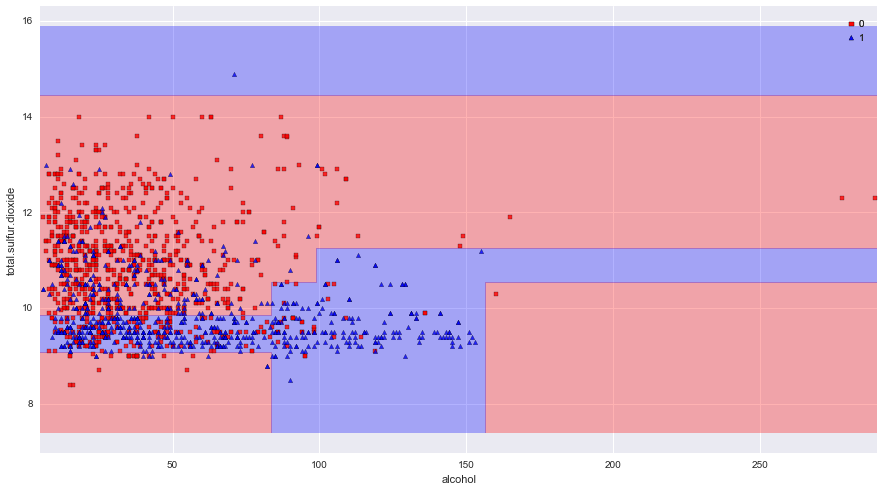

In [103]:
plt.figure(figsize=(15, 8))
plot_decision_regions(X, y, tree)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [104]:
tree.score(X_test, y_test)

0.74791666666666667

Accuracy: 0.74375


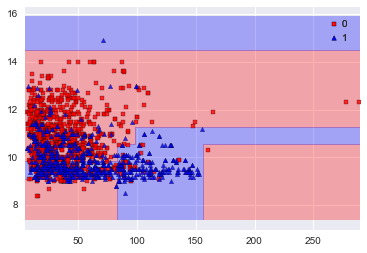

In [105]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=4)
forest.fit(X_train, y_train)
print("Accuracy:", forest.score(X_test, y_test))
plot_decision_regions(X, y, tree)

accuracy 0.66875


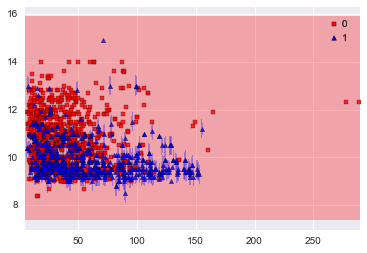

In [107]:
from sklearn.svm import SVC
svc = SVC(gamma=10, kernel="rbf")
svc.fit(X_train, y_train)
print("accuracy", svc.score(X_test, y_test))
plot_decision_regions(X, y, svc)